###### Case Study 3 -Titanic Datasets - Random Forest


Here we will explore more by passing Columns like Name with Title to understand more regarding Survival and observe how Model behaves

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #libraries for visualization
import seaborn as sns
%matplotlib inline

In [60]:
data = pd.read_csv('Titanic_data.csv')

##### Head functions are used to check the top five records 

In [61]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
data.isnull

<bound method DataFrame.isnull of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

<AxesSubplot:>

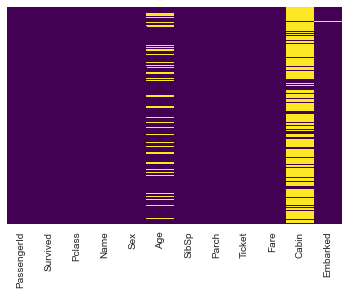

In [63]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

<AxesSubplot:xlabel='Survived', ylabel='count'>

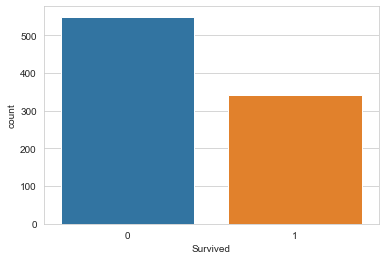

In [64]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

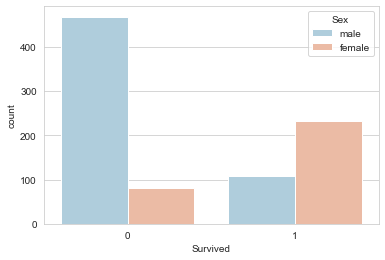

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

#### From this we got into conclusion that Males died more w.r.t to Females. Survival of Females are more comparitive to Male.

<AxesSubplot:xlabel='Survived', ylabel='count'>

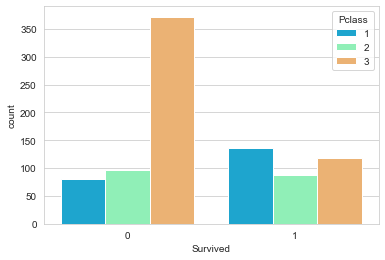

In [66]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

This shows that passengers sitting in PClass3 Died more comparitive to the other class. 

<AxesSubplot:xlabel='Age'>

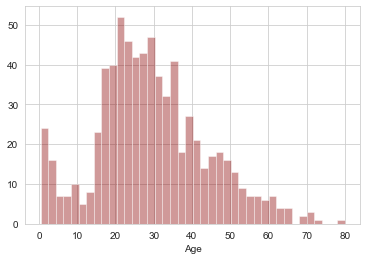

In [67]:
sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

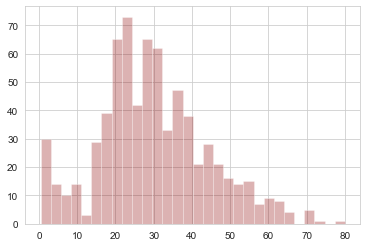

In [68]:

data['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

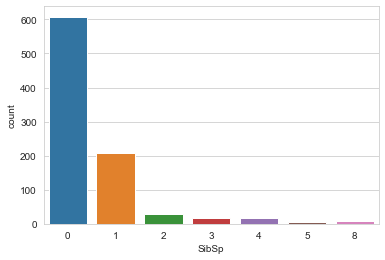

In [69]:
sns.countplot(x='SibSp',data=data)

<AxesSubplot:>

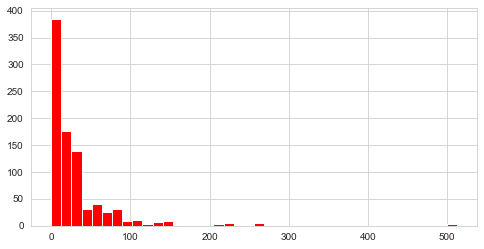

In [70]:
data['Fare'].hist(color='red',bins=40,figsize=(8,4))

#####  Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

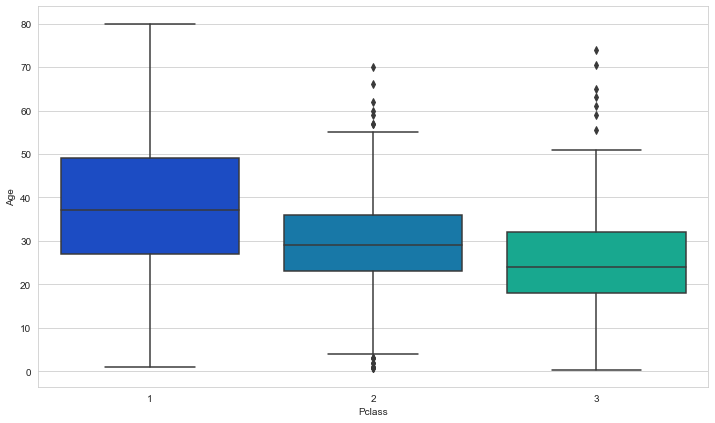

In [71]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age

In [72]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [73]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [74]:
data['Age'].isnull

<bound method Series.isnull of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

<AxesSubplot:>

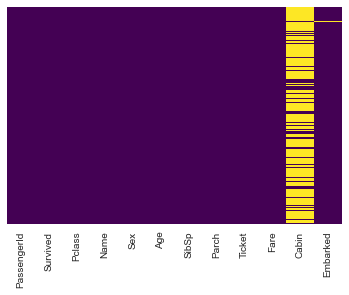

In [75]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Let us drop the Cabin Column as there are many blank values and row Embarked having NAN

In [76]:
data.drop('Cabin',axis=1,inplace=True)

In [77]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [78]:
data.columns[data.isnull().any()]

Index(['Embarked'], dtype='object')

In [79]:
#Hence we are going to drop rows if there are null values in the Embarked Column

In [80]:
data.dropna(inplace=True)

In [81]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [82]:
new = data["Name"].str.split(" ", n = 2, expand = True)
print(new)  
# making separate last name column from new data frame
data["Title"]= new[1]
  
# Dropping old Name columns
data.drop(columns =["Name"], inplace = True)
  
# df display
data

              0      1                                      2
0       Braund,    Mr.                            Owen Harris
1      Cumings,   Mrs.  John Bradley (Florence Briggs Thayer)
2    Heikkinen,  Miss.                                  Laina
3     Futrelle,   Mrs.          Jacques Heath (Lily May Peel)
4        Allen,    Mr.                          William Henry
..          ...    ...                                    ...
886   Montvila,   Rev.                                 Juozas
887     Graham,  Miss.                         Margaret Edith
888   Johnston,  Miss.               Catherine Helen "Carrie"
889       Behr,    Mr.                            Karl Howell
890     Dooley,    Mr.                                Patrick

[889 rows x 3 columns]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr.
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs.
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs.
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S,Rev.
887,888,1,1,female,19.0,0,0,112053,30.0000,S,Miss.
888,889,0,3,female,24.0,1,2,W./C. 6607,23.4500,S,Miss.
889,890,1,1,male,26.0,0,0,111369,30.0000,C,Mr.


In [83]:
# Unique titles
data['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,'], dtype=object)

In [86]:
# Map of aggregated titles:
titles_dict = {'Capt': 'Other',
               'Planke':'Other',
               'Major': 'Other',
               'Billiard':'Other',
               'der':'Other',
               'Walle':'Other',
               'Pelsmaeker':'Other',
               'Mulder':'Other',
               'y':'Other',
               'Steen':'Other',
               'Carlo':'Other',
               'Impe':'Other',
               'Major':'Mr',
               'Gorden':'Other',
               'Messemaeker':'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr.': 'Other',
               'Rev.': 'Other',
               'Col.':'Other',
               'Capt.':'Other',
               'Velde':'Other',
               'the':'Other',
               'Shawah':'Other',
               'Jonkheer.':'Other',
               'Countess': 'Other',
               'Melkebeke':'Other',
               'Cruyssen':'Other',
               'Don.': 'Other',
               'Mme.': 'Mrs',
               'Mlle.': 'Miss',
               'Ms': 'Miss',
               'Mr.': 'Mr',
               'Mrs.': 'Mrs',
               'Ms.': 'Miss',
               'Master.': 'Master',
               'Lady': 'Other'}

In [87]:
# Group titles
data['Title'] = data['Title'].map(titles_dict)
data['Title'].head()

0     Mr
1    Mrs
2    NaN
3    Mrs
4     Mr
Name: Title, dtype: object

In [89]:
 #Transform into categorical
data['Title'] = pd.Categorical(data['Title'])
data.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
Title          category
dtype: object

<AxesSubplot:xlabel='Title', ylabel='Survived'>

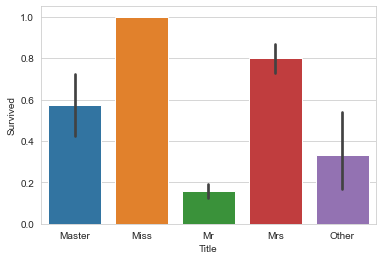

In [90]:
sns.barplot(x='Title', y='Survived', data=data)

## Here we conclude that Mrs, Miss were survived Most comparitive to other cateogories 

In [91]:
pd.get_dummies(data['Title'],drop_first=True)

Title,Miss,Mr,Mrs,Other
0,0,1,0,0
1,0,0,1,0
2,0,0,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
886,0,0,0,1
887,0,0,0,0
888,0,0,0,0
889,0,1,0,0


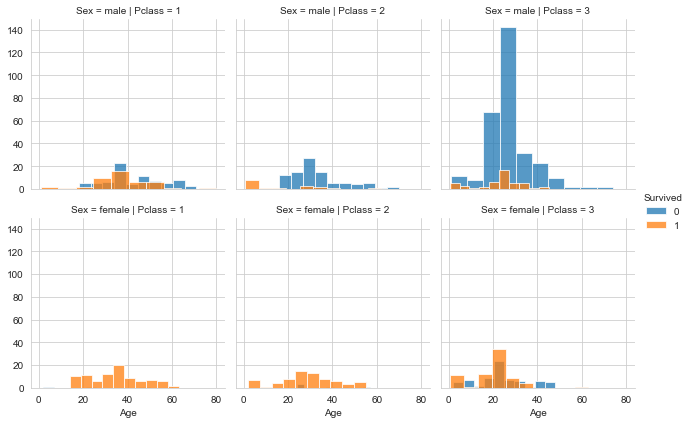

In [92]:
h = sns.FacetGrid(data, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

###  Now we need to convert  the  Categorical Features

We will convert categorical features to dummy variables as our machine learning algorithm won't be able to directly take in those features as inputs.

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
Title          690 non-null category
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 117.5+ KB


In [94]:
pd.get_dummies(data['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [95]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
embark=pd.get_dummies(data['Embarked'],drop_first=True)
title=pd.get_dummies(data['Title'],drop_first=True)

In [97]:
data.drop(['Sex','Embarked','Ticket','Title'],axis=1,inplace=True)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
dtypes: float64(2), int64(5)
memory usage: 95.6 KB


In [103]:
data=pd.concat([data,sex,embark,title],axis=1)

In [104]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S,Miss,Mr,Mrs,Other
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1,0,1,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1,1,0,1,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1,0,0,1,0,0,0,0
888,889,0,3,24.0,1,2,23.4500,0,0,1,0,0,1,0,0,0,0
889,890,1,1,26.0,0,0,30.0000,1,0,0,1,0,0,0,1,0,0


### Applying Random Forest

In [105]:
data.drop(['Survived'],axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S,Miss,Mr,Mrs,Other
0,1,3,22.0,1,0,7.2500,1,0,1,1,0,1,0,1,0,0
1,2,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,1,0
2,3,3,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,0,0
3,4,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,1,0
4,5,3,35.0,0,0,8.0500,1,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1,1,0,1,0,0,0,1
887,888,1,19.0,0,0,30.0000,0,0,1,0,0,1,0,0,0,0
888,889,3,24.0,1,2,23.4500,0,0,1,0,0,1,0,0,0,0
889,890,1,26.0,0,0,30.0000,1,0,0,1,0,0,0,1,0,0


In [106]:
#Print the unique values in the columns
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S,Miss,Mr,Mrs,Other
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1,0,1,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1,1,0,1,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1,0,0,1,0,0,0,0
888,889,0,3,24.0,1,2,23.4500,0,0,1,0,0,1,0,0,0,0
889,890,1,1,26.0,0,0,30.0000,1,0,0,1,0,0,0,1,0,0


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data.drop(['Survived'],axis=1), data["Survived"], test_size = 0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(622, 16)
(267, 16)
(622,)
(267,)


In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
Y_pred_train = classifier.predict(X_train) #predictions on training data

In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(Y_train,Y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       386
           1       1.00      1.00      1.00       236

    accuracy                           1.00       622
   macro avg       1.00      1.00      1.00       622
weighted avg       1.00      1.00      1.00       622



In [113]:
y_test_predict = classifier.predict(X_test)

In [114]:
print(classification_report(Y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       163
           1       0.84      0.73      0.78       104

    accuracy                           0.84       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



#### Here we found that accuracy dropped from 100% to 85% and got into following conclusion related to Survival
We confirm the observation during problem definition that Sex=female had very high survival rate.
Here we conclude that Miss were survived most comparitive to Mrs and given preference over survial.
